In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/lodetomasi1995/income-classification
df = pd.read_csv('14-income_evaluation.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
col_names = ["age", "workclass", "finalweight", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex",
              "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

In [7]:
df.columns = col_names

In [8]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
df.describe()

,age,finalweight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [12]:
# distribution of values is normal in target class. it's not imbalanced.

In [13]:
# we'll do some operations on categorical columns. so we should split the columns as categorical and numerical

In [14]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
numerical = [col for col in df.columns if df[col].dtype != "O"]

In [15]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [16]:
print(numerical)

['age', 'finalweight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [17]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [18]:
for col in categorical:
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [19]:
# there are some unknown(?) datas in categorical columns.

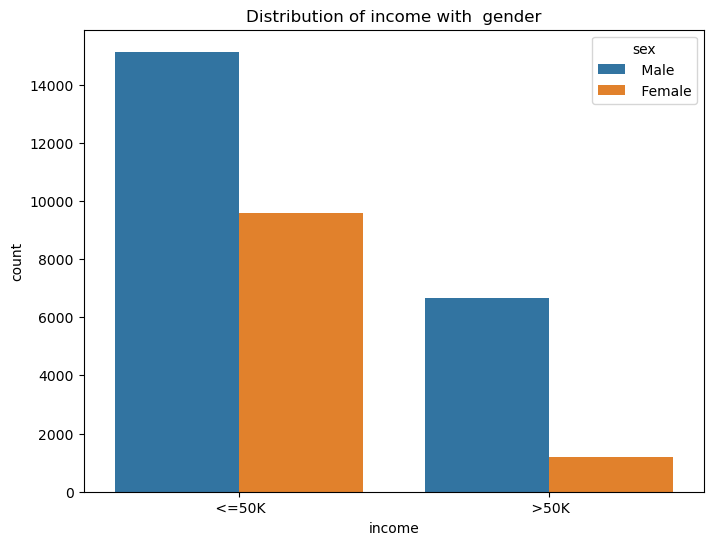

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.countplot(data=df, x='income', hue='sex')
ax.set_title("Distribution of income with  gender") 
plt.show()  

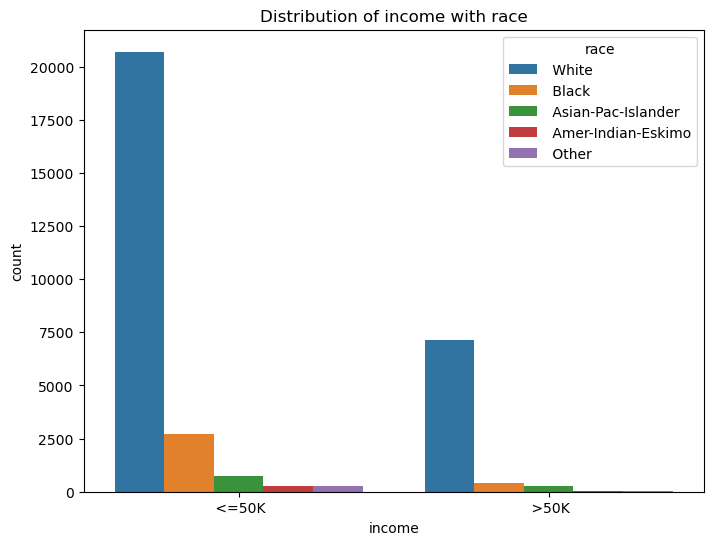

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.countplot(data=df, x='income', hue='race')
ax.set_title("Distribution of income with race") 
plt.show()  

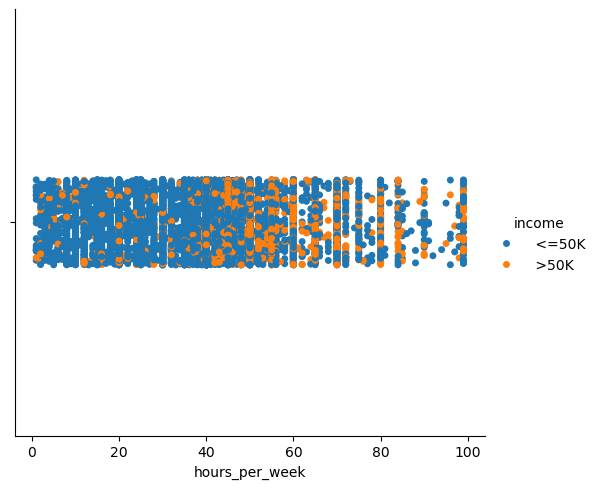

In [22]:
sns.catplot(data=df, x='hours_per_week', hue='income')
plt.show()

In [23]:
#males making more than females
#white making more than races
#people who work more making more than who less work

In [24]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [25]:
df['workclass'] = df['workclass'].replace(" ?", np.nan)

In [26]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [27]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [28]:
df['occupation'] = df['occupation'].replace(" ?", np.nan)

In [29]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [30]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [31]:
df['native_country'] = df['native_country'].replace(" ?", np.nan)

In [32]:
df['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [33]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [34]:
df[numerical].isnull().sum()

age               0
finalweight       0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

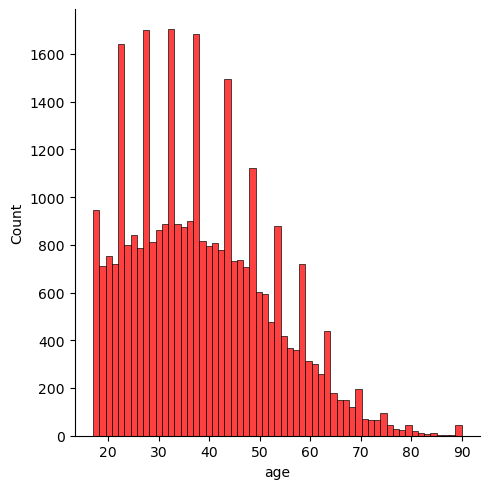

In [35]:
sns.displot(df['age'], color='red')
plt.show()

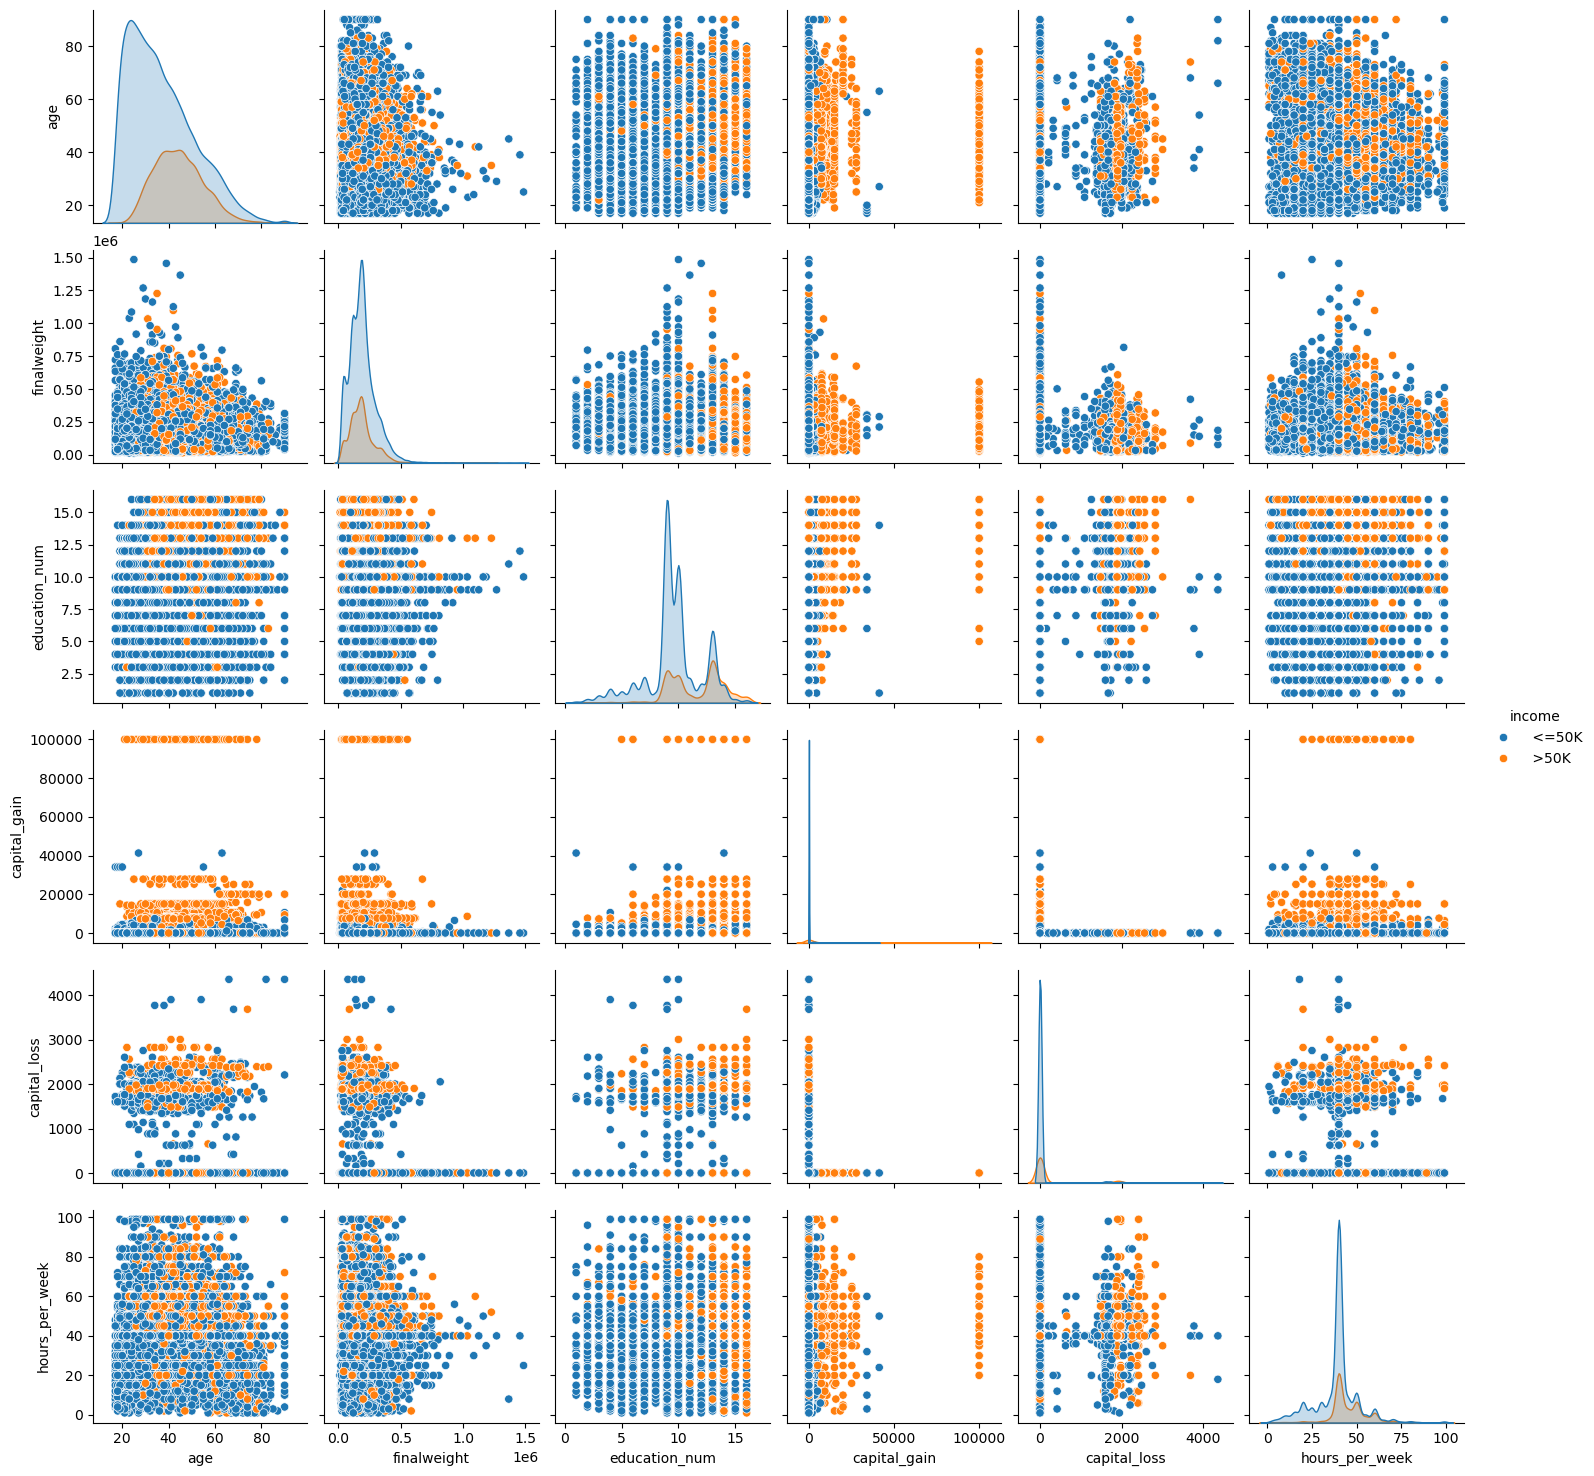

In [36]:
sns.pairplot(df, hue='income')
plt.show()

In [37]:
# features

In [38]:
X = df.drop('income', axis=1)
y = df['income'] 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [41]:
#we need to recreate the 'categorical' because 'income' is not inside the categorical now.

In [42]:
categorical = [col for col in X_train.columns if X_train[col].dtype == "O"]

In [43]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
dtype: int64

In [44]:
#we'll fill the missing data with mode of that categorical data

In [45]:
for i in [X_train, X_test]:
    i['workclass'] = i['workclass'].fillna(X_train['workclass'].mode()[0])
    i['occupation'] = i['occupation'].fillna(X_train['occupation'].mode()[0])
    i['native_country'] = i['native_country'].fillna(X_train['native_country'].mode()[0])

In [46]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [47]:
X_test.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [48]:
#encoding

In [49]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32174,Self-emp-not-inc,Bachelors,Never-married,Sales,Not-in-family,White,Male,United-States
2680,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,El-Salvador
10874,Private,Some-college,Widowed,Exec-managerial,Unmarried,White,Female,United-States
25028,Private,9th,Married-civ-spouse,Craft-repair,Husband,Other,Male,Mexico
25881,Self-emp-inc,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States


In [50]:
df[categorical].nunique()

workclass          8
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
dtype: int64

In [51]:
# there are many unique values in native_country. if we do one hot encoding it might work but it might get complicated
# because there will be many columns and it may lead to overfitting or underperforming generally
# so i will do target encoding for native country and one hot encoding for the rest.
# for target encoding i will get the mean of every unique value and replace it with them

In [52]:
# in order to get a mean from income column, i need to make it 1 or 0
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == '>50K' else 0)

# this will give me the average of 0s and 1s for native countries so i can encode it using these values
target_means = y_train_binary.groupby(X_train['native_country']).mean()

In [53]:
target_means

native_country
Cambodia                      0.363636
Canada                        0.287500
China                         0.280702
Columbia                      0.046512
Cuba                          0.276923
Dominican-Republic            0.023810
Ecuador                       0.157895
El-Salvador                   0.129032
England                       0.301587
France                        0.368421
Germany                       0.333333
Greece                        0.222222
Guatemala                     0.022727
Haiti                         0.120000
Honduras                      0.000000
Hong                          0.333333
Hungary                       0.250000
India                         0.347826
Iran                          0.423077
Ireland                       0.076923
Italy                         0.280000
Jamaica                       0.109091
Japan                         0.382979
Laos                          0.166667
Mexico                        0.062907
Nicaragua 

In [54]:
X_train['native_country_encoded'] = X_train['native_country'].map(target_means)
X_train['native_country_encoded'] = X_train['native_country_encoded'].fillna(y_train_binary.mean())

X_test['native_country_encoded'] = X_test['native_country'].map(target_means)
X_test['native_country_encoded'] = X_test['native_country_encoded'].fillna(y_train_binary.mean())

In [55]:
X_train.head()

,age,workclass,finalweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,native_country_encoded
32174,44,Self-emp-not-inc,157217,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,42,United-States,0.247311
2680,26,Local-gov,336969,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,28,El-Salvador,0.129032
10874,53,Private,233369,Some-college,10,Widowed,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,0.247311
25028,30,Private,348618,9th,5,Married-civ-spouse,Craft-repair,Husband,Other,Male,0,0,40,Mexico,0.062907
25881,50,Self-emp-inc,140516,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0.247311


In [56]:
X_train = X_train.drop('native_country', axis=1)
X_test = X_test.drop('native_country', axis=1)

In [57]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [58]:
# rest will be encoded
one_hot_categories = [
    'workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex'
]

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [60]:
encoder = ColumnTransformer(
    transformers = [
        ("ohe", OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_categories)
    ],
    remainder = 'passthrough'
)

X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [61]:
# this gives X_train as numpy array if you want to turn this into df you have to get column names

In [62]:
X_train_enc

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.20000000e+01, 2.47311312e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 2.80000000e+01, 1.29032258e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.47311312e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e+01, 2.47311312e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.57900000e+03, 4.00000000e+01, 2.47311312e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+01, 2.47311312e-01]],
      shape=(22792, 65))

In [63]:
# get all encoded column names
columns = encoder.get_feature_names_out()

In [64]:
columns

array(['ohe__workclass_ Federal-gov', 'ohe__workclass_ Local-gov',
       'ohe__workclass_ Never-worked', 'ohe__workclass_ Private',
       'ohe__workclass_ Self-emp-inc', 'ohe__workclass_ Self-emp-not-inc',
       'ohe__workclass_ State-gov', 'ohe__workclass_ Without-pay',
       'ohe__education_ 10th', 'ohe__education_ 11th',
       'ohe__education_ 12th', 'ohe__education_ 1st-4th',
       'ohe__education_ 5th-6th', 'ohe__education_ 7th-8th',
       'ohe__education_ 9th', 'ohe__education_ Assoc-acdm',
       'ohe__education_ Assoc-voc', 'ohe__education_ Bachelors',
       'ohe__education_ Doctorate', 'ohe__education_ HS-grad',
       'ohe__education_ Masters', 'ohe__education_ Preschool',
       'ohe__education_ Prof-school', 'ohe__education_ Some-college',
       'ohe__marital_status_ Divorced',
       'ohe__marital_status_ Married-AF-spouse',
       'ohe__marital_status_ Married-civ-spouse',
       'ohe__marital_status_ Married-spouse-absent',
       'ohe__marital_status_ Never-mar

In [65]:
X_train = pd.DataFrame(X_train_enc, columns = columns, index = X_train.index)
X_test = pd.DataFrame(X_test_enc, columns = columns, index = X_test.index)

In [66]:
X_train

,ohe__workclass_ Federal-gov,ohe__workclass_ Local-gov,ohe__workclass_ Never-worked,ohe__workclass_ Private,ohe__workclass_ Self-emp-inc,ohe__workclass_ Self-emp-not-inc,ohe__workclass_ State-gov,ohe__workclass_ Without-pay,ohe__education_ 10th,ohe__education_ 11th,...,ohe__race_ White,ohe__sex_ Female,ohe__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
32174,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,44.0,157217.0,13.0,0.0,0.0,42.0,0.247311
2680,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,26.0,336969.0,13.0,0.0,0.0,28.0,0.129032
10874,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,53.0,233369.0,10.0,0.0,0.0,40.0,0.247311
25028,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,30.0,348618.0,5.0,0.0,0.0,40.0,0.062907
25881,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,50.0,140516.0,13.0,0.0,0.0,40.0,0.247311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,36.0,376455.0,11.0,0.0,0.0,38.0,0.247311
2693,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,24.0,145964.0,13.0,0.0,0.0,40.0,0.247311
8076,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,50.0,136913.0,9.0,0.0,0.0,50.0,0.247311
20213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,25.0,182227.0,9.0,0.0,1579.0,40.0,0.247311


In [67]:
X_test

,ohe__workclass_ Federal-gov,ohe__workclass_ Local-gov,ohe__workclass_ Never-worked,ohe__workclass_ Private,ohe__workclass_ Self-emp-inc,ohe__workclass_ Self-emp-not-inc,ohe__workclass_ State-gov,ohe__workclass_ Without-pay,ohe__education_ 10th,ohe__education_ 11th,...,ohe__race_ White,ohe__sex_ Female,ohe__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
10125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,47.0,182752.0,9.0,0.0,0.0,35.0,0.423077
11478,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,73.0,161027.0,3.0,0.0,0.0,20.0,0.247311
4224,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,18.0,152182.0,10.0,0.0,0.0,25.0,0.247311
6592,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,66.0,284021.0,9.0,0.0,0.0,40.0,0.247311
21910,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,39.0,261504.0,8.0,0.0,0.0,40.0,0.247311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31624,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,29.0,261725.0,13.0,0.0,0.0,35.0,0.247311
1488,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,57.0,278763.0,9.0,0.0,0.0,40.0,0.247311
8725,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,48.0,334409.0,13.0,0.0,0.0,50.0,0.247311
11150,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,37.0,302604.0,10.0,0.0,0.0,40.0,0.247311


In [68]:
# we don't actually need scaling in dt algortihms but let's do it because we will introduce robust scaler

In [69]:
# robust scaler is different than standardscaler and it is designed to handle outliers.

In [70]:
cols = X_train.columns

In [71]:
from sklearn.preprocessing import RobustScaler

In [72]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
X_train

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  4.00000000e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -2.40000000e+00, -1.18279054e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.57900000e+03,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
      shape=(22792, 65))

In [74]:
# we don't have to convert X_train into df again, we can just give it as a numpy array to model but 
# if we want to use column names again later it will come in handy

In [75]:
X_train = pd.DataFrame(X_train, columns = cols)
X_test = pd.DataFrame(X_test, columns = cols)

In [76]:
X_train

,ohe__workclass_ Federal-gov,ohe__workclass_ Local-gov,ohe__workclass_ Never-worked,ohe__workclass_ Private,ohe__workclass_ Self-emp-inc,ohe__workclass_ Self-emp-not-inc,ohe__workclass_ State-gov,ohe__workclass_ Without-pay,ohe__education_ 10th,ohe__education_ 11th,...,ohe__race_ White,ohe__sex_ Female,ohe__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.35,-0.175622,1.000000,0.0,0.0,0.4,0.000000
1,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.55,1.335801,1.000000,0.0,0.0,-2.4,-0.118279
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.80,0.464693,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,-0.35,1.433750,-1.666667,0.0,0.0,0.0,-0.184405
4,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.65,-0.316050,1.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.05,1.667814,0.333333,0.0,0.0,-0.4,0.000000
22788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.65,-0.270241,1.000000,0.0,0.0,0.0,0.000000
22789,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.65,-0.346345,-0.333333,0.0,0.0,2.0,0.000000
22790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.60,0.034672,-0.333333,0.0,1579.0,0.0,0.000000


In [77]:
#training

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(n_estimators=10, random_state=15)

In [80]:
rfc.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:
y_pred = rfc.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

Accuracy Score : 0.8538233186610708
Confusion Matrix :
 [[6950  494]
 [ 934 1391]]
Classification Report :
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7444
        >50K       0.74      0.60      0.66      2325

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



In [84]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

Accuracy Score : 0.8629337700890573
Confusion Matrix :
 [[6931  513]
 [ 826 1499]]
Classification Report :
               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7444
        >50K       0.75      0.64      0.69      2325

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [85]:
# let's try to see feature importance

In [86]:
rfc.feature_importances_

array([5.69055082e-03, 5.99724101e-03, 0.00000000e+00, 1.12368919e-02,
       5.95071218e-03, 8.91584273e-03, 4.44950659e-03, 1.56222107e-05,
       1.43250082e-03, 2.06212244e-03, 7.56054267e-04, 2.47339516e-04,
       6.20143042e-04, 1.74701664e-03, 9.28370165e-04, 2.64825643e-03,
       2.92500662e-03, 1.18834812e-02, 3.23796318e-03, 8.75179388e-03,
       8.46728337e-03, 4.67159279e-05, 4.58505562e-03, 5.54684103e-03,
       7.22921226e-03, 4.55704258e-04, 6.17226949e-02, 8.59519893e-04,
       2.66463955e-02, 1.51187990e-03, 1.65333428e-03, 6.01740973e-03,
       1.25865119e-05, 7.18922808e-03, 1.94907607e-02, 4.62408780e-03,
       3.23039158e-03, 4.70621344e-03, 7.71451124e-03, 1.00623188e-04,
       1.03969798e-02, 3.37451763e-03, 7.44332386e-03, 4.98338169e-03,
       4.99524888e-03, 4.15588436e-02, 9.79975556e-03, 1.46458315e-03,
       1.00803184e-02, 4.03157165e-03, 1.00765407e-02, 1.36690237e-03,
       3.32325527e-03, 5.12576566e-03, 9.26582257e-04, 7.11168066e-03,
      

In [87]:
feature_scores = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending = False)

In [88]:
feature_scores

remainder__finalweight              0.160516
remainder__age                      0.151197
remainder__capital_gain             0.093268
remainder__hours_per_week           0.084478
remainder__education_num            0.067521
                                      ...   
ohe__occupation_ Priv-house-serv    0.000101
ohe__education_ Preschool           0.000047
ohe__workclass_ Without-pay         0.000016
ohe__occupation_ Armed-Forces       0.000013
ohe__workclass_ Never-worked        0.000000
Length: 65, dtype: float64

In [89]:
feature_scores.tail(10)

ohe__marital_status_ Married-spouse-absent    0.000860
ohe__education_ 12th                          0.000756
ohe__education_ 5th-6th                       0.000620
ohe__marital_status_ Married-AF-spouse        0.000456
ohe__education_ 1st-4th                       0.000247
ohe__occupation_ Priv-house-serv              0.000101
ohe__education_ Preschool                     0.000047
ohe__workclass_ Without-pay                   0.000016
ohe__occupation_ Armed-Forces                 0.000013
ohe__workclass_ Never-worked                  0.000000
dtype: float64

In [90]:
# we can drop this least useful features

In [91]:
X_train = X_train.drop(["ohe__marital_status_ Married-spouse-absent", "ohe__education_ 12th", "ohe__education_ 5th-6th", 
             "ohe__marital_status_ Married-AF-spouse", "ohe__education_ 1st-4th", "ohe__occupation_ Priv-house-serv",
             "ohe__education_ Preschool", "ohe__workclass_ Without-pay", "ohe__occupation_ Armed-Forces", "ohe__workclass_ Never-worked"],
             axis=1)

In [92]:
X_test = X_test.drop(["ohe__marital_status_ Married-spouse-absent", "ohe__education_ 12th", "ohe__education_ 5th-6th", 
             "ohe__marital_status_ Married-AF-spouse", "ohe__education_ 1st-4th", "ohe__occupation_ Priv-house-serv",
             "ohe__education_ Preschool", "ohe__workclass_ Without-pay", "ohe__occupation_ Armed-Forces", "ohe__workclass_ Never-worked"],
             axis=1)

In [93]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

Accuracy Score : 0.8643668748080663
Confusion Matrix :
 [[6940  504]
 [ 821 1504]]
Classification Report :
               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7444
        >50K       0.75      0.65      0.69      2325

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [94]:
# Hyperparameter Tuning

In [95]:
params = {
    "n_estimators" : [100, 300, 500, 1000],
    "max_depth" : [2, 3, 5, 10],
    "min_samples_split" : [2, 8, 15, 20, 50],
    "max_features" : ["sqrt", "log2", None, 3, 5, 8, 15]
}

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
rscv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = params, cv = 5, n_jobs = -1)

In [98]:
rscv.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [2, 3, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_split': [2, 8, ...], 'n_estimators': [100, 300, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [99]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 15,
 'max_features': 15,
 'max_depth': 10}

In [100]:
y_pred = rscv.predict(X_test)

In [101]:
print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))
print("Classification Report :\n", classification_report(y_test, y_pred))

Accuracy Score : 0.8636503224485618
Confusion Matrix :
 [[7065  379]
 [ 953 1372]]
Classification Report :
               precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7444
        >50K       0.78      0.59      0.67      2325

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769

